<a href="https://colab.research.google.com/github/FrancLis/Multivariate-Time-Series-Forecasting/blob/main/3_Linear_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Analysis

A linear regression analysis has been tried to observe the behaviour of the data

In [1]:
%matplotlib inline
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import sys
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
file = r"/content/PG.csv"
df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-01-02,1.710938,1.722656,1.708984,1.718750,0.399508,832000
1970-01-05,1.718750,1.730469,1.708984,1.726563,0.401324,518400
1970-01-06,1.722656,1.722656,1.707031,1.718750,0.399508,480000
1970-01-07,1.722656,1.750000,1.722656,1.746094,0.405864,710400
1970-01-08,1.746094,1.773438,1.742188,1.765625,0.410404,531200
...,...,...,...,...,...,...
2022-02-03,161.979996,164.979996,161.619995,164.139999,164.139999,10474500
2022-02-04,163.130005,164.490005,161.410004,161.529999,161.529999,8959900
2022-02-07,161.869995,162.259995,159.669998,160.320007,160.320007,6430500


In [3]:
df = df.rename(columns={"Adj Close": "AdjClose"})

In [4]:
df['Close_shifted'] = df['Close'].shift(periods=1)
ds = df.dropna()
ds

,Open,High,Low,Close,AdjClose,Volume,Close_shifted
Date,,,,,,,
1970-01-05,1.718750,1.730469,1.708984,1.726563,0.401324,518400,1.718750
1970-01-06,1.722656,1.722656,1.707031,1.718750,0.399508,480000,1.726563
1970-01-07,1.722656,1.750000,1.722656,1.746094,0.405864,710400,1.718750
1970-01-08,1.746094,1.773438,1.742188,1.765625,0.410404,531200,1.746094
1970-01-09,1.765625,1.765625,1.753906,1.761719,0.409496,262400,1.765625
...,...,...,...,...,...,...,...
2022-02-03,161.979996,164.979996,161.619995,164.139999,164.139999,10474500,162.600006
2022-02-04,163.130005,164.490005,161.410004,161.529999,161.529999,8959900,164.139999
2022-02-07,161.869995,162.259995,159.669998,160.320007,160.320007,6430500,161.529999


# OLS



**OLS** is a common technique used in analyzing linear regression. In brief, it compares the difference between individual points in your data set and the predicted best fit line to measure the amount of error produced. 

The smf.ols() function requires two inputs, the formula for producing the best fit line, and the dataset.

The formula is provided as a string, in the following form:

***‘dependent variable ~ list of independent variables separated by the + symbol’*** 

In plain terms, the dependent variable is the factor you are trying to predict, and on the other side of the formula are the variables you are using to predict.

In [5]:
mod = smf.ols("Close_shifted ~ Open + High + Low	+ Close + AdjClose + Volume", data=ds)
reg = mod.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Close_shifted   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.397e+07
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:26:01   Log-Likelihood:                -4946.2
No. Observations:               13144   AIC:                             9906.
Df Residuals:                   13137   BIC:                             9959.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0134      0.005     -2.546      0.011      -0.024      -0.003
Open           0.7185      0.010     71.559      0.000       0.699       0.738
High           0.3990      0.011     35.138      0.000       0.377       0.421
Low            0.1301      0.010     13.487      0.000       0.111       0.149
Close         -0.2490      0.011    -23.015      0.000      -0.270      -0.228
AdjClose      -0.0008      0.001     -1.666      0.096      -0.002       0.000
Volume      3.566e-09   7.58e-10      4.707      0.000    2.08e-09    5.05e-09
==============================================================================
Omnibus:                    11603.731   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14697503.270
Skew:                           3.023   Prob(JB):                         0.00
Kurtosis:                     166.707   Cond. No.                     4.43e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Summary explanation**

The top of our summary starts by giving us a few details we already know. 


**Df Residuals** 

is another name for our Degrees of Freedom in our mode.
This is calculated in the form of ‘n-k-1’ or ‘number of observations-number of predicting variables-1.’ 

**Df Model** 

numbers our predicting variables. If you’re wondering why we only entered 3 predicting variables into the formula but both Df Residuals and Model are saying there are 6, we’ll get into this later. 

**Covariance Type**

Covariance is a measure of how two variables are linked in a positive or negative manner, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the case here.

**R-squared** 

is possibly the most important measurement produced by this summary. R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. 

**Adjusted R-squared**

R-squared value will never go down with additional variables, only equal or higher. Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly.

**F-statistic**

In linear regression is comparing your produced linear model for your variables against a model that replaces your variables’ effect to 0, to find out if your group of variables are statistically significant. To interpret this number correctly, using a chosen alpha value and an F-table is necessary. 

**Prob (F-Statistic)** 

uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. In this case, it is telling us 0.00107% chance of this. 

**Log-likelihood** 

is a numerical signifier of the likelihood that your produced model produced the given data. It is used to compare coefficient values for each variable in the process of creating the model.

**AIC** - **BIC** 

both used to compare the efficacy of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.



**Intercept**

is the result of our model if all variables were tuned to 0. In the classic ‘y = mx+b’ linear formula, it is our b, a constant added to explain a starting value for our line.


**coefficient** 

For our intercept, it is the value of the intercept. For each variable, it is the measurement of how change in that variable affects the independent variable. It is the ‘m’ in ‘y = mx + b’ One unit of change in the dependent variable will affect the variable’s coefficient’s worth of change in the independent variable. If the coefficient is negative, they have an inverse relationship. As one rises, the other falls.

**std error** 

is an estimate of the standard deviation of the coefficient, a measurement of the amount of variation in the coefficient throughout its data points. The t is related and is a measurement of the precision with which the coefficient was measured. A low std error compared to a high coefficient produces a high **t statistic**, which signifies a high significance for your coefficient.

**P>|t|** is one of the most important statistics in the summary. It uses the t statistic to produce the **p value**, a measurement of how likely your coefficient is measured through our model by chance. The p value of 0.378 for Wealth is saying there is a 37.8% chance the Wealth variable has no affect on the dependent variable, Lottery, and our results are produced by chance. Proper model analysis will compare the p value to a previously established alpha value, or a threshold with which we can apply significance to our coefficient. A common alpha is 0.05, which few of our variables pass in this instance.
[0.025 and 0.975] are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

**Omnibus** 

describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy. 

**Prob(Omnibus)** 

is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution.

**Skew**

is a measurement of symmetry in our data, with 0 being perfect symmetry.

**Kurtosis**

 measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers.

**Durbin-Watson**
 is a measurement of homoscedasticity, or an even distribution of errors throughout our data. Heteroscedasticity would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. Ideal homoscedasticity will lie between 1 and 2.

**Jarque-Bera (JB)** and **Prob(JB)**

are alternate methods of measuring the same value as Omnibus and Prob(Omnibus) using skewness and kurtosis. We use these values to confirm each other. Condition number is a measurement of the sensitivity of our model as compared to the size of changes in the data it is analyzing. Multicollinearity is strongly implied by a high condition number. Multicollinearity a term to describe two or more independent variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy.

Our definitions barely scratch the surface of any one of these topics. Independent research is strongly encouraged for an understanding of these terms and how they relate to one another.

Durbin-Watson 2.165 error uncorrelated

In [6]:
# base code
import statsmodels
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax


    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax


    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))

In [7]:
cls1 = Linear_Reg_Diagnostic(reg)

**Plot 1: Residuals vs Fitted plot**

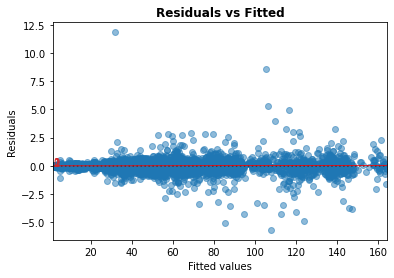

In [8]:
cls1.residual_plot()

This is probably the most important plot to understand, and it’s easy to apply this same idea to any other model you work with, regression or otherwise.
The X-axis is the Fitted Values, which are the **y-predictions**, and the y-Axis is the **Residuals** which represent the difference between the predictions and the actual y-values. Your goal with this plot should be to make sure that your observations are normally distributed around zero, with equal variance at each point. 
For this example, it’s near perfect, as you can see the observations are normally distributed around zero with few outliers.
It’s very common to see trumpet / fan shaped plots for these, which tend to indicate that there is heteroscedasticity (yes, that’s a real word) present (we’ll talk about this in a little bit), or you’ll see a pattern in them (highlighted through the red spline) which indicates there is a pattern that you are not accounting for. In that case you should do some feature engineering.

We have seen that if the residual errors are not identically distributed, we cannot use tests of significance such as the F-test for regression analysis or perform confidence interval checking on the regression model’s coefficients or the model’s predictions. Many of these tests depend on the residual errors being independent, identically distributed random variables.

**Plot 2: Normal Q-Q plot**

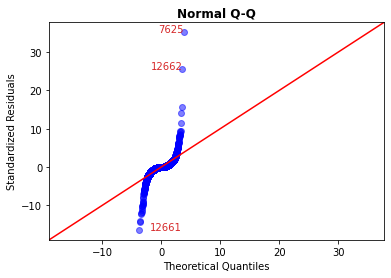

In [9]:
cls1.qq_plot();

This plot indicates if the residuals are normally distributed, reinforcing the idea from the Residuals vs Fitted plot. If the residuals follow a straight line, they are more normally distributed, and if they deviate severely they may not be so normal and there could be a pattern in your data you are missing.

In [10]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(reg.resid, reg.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 3000.979437851506),
 ('p-value', 0.0),
 ('f-value', 647.7995818815612),
 ('f p-value', 0.0)]

**Durbin-Watson test**

A test of autocorrelation that is designed to take account of the regression model is the Durbin-Watson test (also included in the regression summary). It is used to test the hypothesis that there is no lag one autocorrelation in the residuals. This means if there is no lag one autocorrelation, then information about $ϵi
p
r
o
v
i
d
e
s
l
i
t
t
l
e
o
r
n
o
i
n
f
o
r
m
a
t
i
o
n
a
b
o
u
t
ϵ{i+1}.

A small p-value indicates there is significant autocorrelation remaining in the residuals.

If there is no autocorrelation, the Durbin-Watson distribution is symmetric around 2.

As a rough rule of thumb (Field, 2013):

If Durbin–Watson is less than 1.0, there may be cause for concern.
Small values of d indicate successive error terms are positively correlated.
If d > 2, successive error terms are negatively correlated.

In [11]:
sm.stats.durbin_watson(reg.resid)

2.164871725534437

**Collinearity**

Collinearity refers to the situation in which two or more predictor variables collinearity are closely related to one another. The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response.

It is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation. We call this situation **multicollinearity**.



**Variance inflation factor (VIF)**

Instead of inspecting the correlation matrix, a better way to assess multicollinearity is to compute the variance inflation factor (VIF). Note that we ignore the intercept in this test.

The smallest possible value for VIF is 1, which indicates the complete absence of collinearity. Typically in practice there is a small amount of collinearity among the predictors.

As a rule of thumb, a VIF value that exceeds 5 indicates a problematic amount of collinearity and the parameter estimates will have large standard errors because of this.

**VIF measures the ratio between the variance for a given regression coefficient with only that variable in the model versus the variance for a given regression coefficient with all variables in the model.**
A VIF of 1 (the minimum possible VIF) means the tested predictor is not correlated with the other predictors.A VIF of 1 (the minimum possible VIF) means the tested predictor is not correlated with the other predictors.

In [12]:
cls1.vif_table()

    Features  VIF Factor
6     Volume        1.68
0  Intercept        2.92
5   AdjClose       30.86
3        Low    13202.92
1       Open    14494.01
4      Close    16841.11
2       High    18813.43


Ultimately, the presence of multicollinearity results in several problems:


1.   The fitted regression coefficients (beta hat) will change substantially if one of the values of one of the x variables is changed only a bit.
2.   The variance of the estimated coefficients will be inflated, which means that it will be hard to detect statistical significance. Furthermore, it’s possible that the F statistic is significant but the individual t statistics are not.
3.   Ultimately, multicollinearity makes prediction less accurate. For a given model, the underlying assumption is that the relationships among the predicting variables, as well as their relationship with the target variable, will be the same. However, when multicollinearity is present, this is less likely to be the case.








# Correlation, causation and forecasting

Correlation is not causation
It is important not to confuse correlation with causation, or causation with forecasting. A variable x may be useful for forecasting a variable y, but that does not mean x is causing y. It is possible that x is causing y, but it may be that yy is causing x, or that the relationship between them is more complicated than simple causality.
For example, it is possible to model the number of drownings at a beach resort each month with the number of ice-creams sold in the same period. The model can give reasonable forecasts, not because ice-creams cause drownings, but because people eat more ice-creams on hot days when they are also more likely to go swimming. So the two variables (ice-cream sales and drownings) are correlated, but one is not causing the other. They are both caused by a third variable (temperature). This is an example of “confounding” — where an omitted variable causes changes in both the response variable and at least one predictor variables.
We describe a variable that is not included in our forecasting model as a confounder when it influences both the response variable and at least one predictor variable. Confounding makes it difficult to determine what variables are causing changes in other variables, but it does not necessarily make forecasting more difficult.
Similarly, it is possible to forecast if it will rain in the afternoon by observing the number of cyclists on the road in the morning. When there are fewer cyclists than usual, it is more likely to rain later in the day. The model can give reasonable forecasts, not because cyclists prevent rain, but because people are more likely to cycle when the published weather forecast is for a dry day. In this case, there is a causal relationship, but in the opposite direction to our forecasting model. The number of cyclists falls because there is rain forecast. That is, y (rainfall) is affecting x (cyclists).

It is important to understand that correlations are useful for forecasting, even when there is no causal relationship between the two variables, or when the causality runs in the opposite direction to the model, or when there is confounding.
However, often a better model is possible if a causal mechanism can be determined. A better model for drownings will probably include temperatures and visitor numbers and exclude ice-cream sales. A good forecasting model for rainfall will not include cyclists, but it will include atmospheric observations from the previous few days.

Forecasting with correlated predictors

When two or more predictors are highly correlated it is always challenging to accurately separate their individual effects. Suppose we are forecasting monthly sales of a company for 2012, using data from 2000–2011. In January 2008, a new competitor came into the market and started taking some market share. At the same time, the economy began to decline. In your forecasting model, you include both competitor activity (measured using advertising time on a local television station) and the health of the economy (measured using GDP). It will not be possible to separate the effects of these two predictors because they are highly correlated.
Having correlated predictors is not really a problem for forecasting, as we can still compute forecasts without needing to separate out the effects of the predictors. However, it becomes a problem with scenario forecasting as the scenarios should take account of the relationships between predictors. It is also a problem if some historical analysis of the contributions of various predictors is required.

**Multicollinearity and forecasting**

A closely related issue is multicollinearity, which occurs when similar information is provided by two or more of the predictor variables in a multiple regression.
It can occur when two predictors are highly correlated with each other (that is, they have a correlation coefficient close to +1 or -1). In this case, knowing the value of one of the variables tells you a lot about the value of the other variable. Hence, they are providing similar information. For example, foot size can be used to predict height, but including the size of both left and right feet in the same model is not going to make the forecasts any better, although it won’t make them worse either.

Multicollinearity can also occur when a linear combination of predictors is highly correlated with another linear combination of predictors. In this case, knowing the value of the first group of predictors tells you a lot about the value of the second group of predictors. Hence, they are providing similar information.
An example of this problem is the dummy variable trap discussed in Section 5.4. Suppose you have quarterly data and use four dummy variables, d1, d2, d3 and d4. Then d4=1−d1−d2−d3, so there is perfect correlation between d4 and d1+d2+d3.
In the case of perfect correlation (i.e., a correlation of +1 or -1, such as in the dummy variable trap), it is not possible to estimate the regression model.
If there is high correlation (close to but not equal to +1 or -1), then the estimation of the regression coefficients is computationally difficult. In fact, some software (notably Microsoft Excel) may give highly inaccurate estimates of the coefficients. Most reputable statistical software will use algorithms to limit the effect of multicollinearity on the coefficient estimates, but you do need to be careful. The major software packages such as R, SPSS, SAS and Stata all use estimation algorithms to avoid the problem as much as possible.

When multicollinearity is present, the uncertainty associated with individual regression coefficients will be large. This is because they are difficult to estimate. Consequently, statistical tests (e.g., t-tests) on regression coefficients are unreliable. (In forecasting we are rarely interested in such tests.) Also, it will not be possible to make accurate statements about the contribution of each separate predictor to the forecast.
Forecasts will be unreliable if the values of the future predictors are outside the range of the historical values of the predictors. For example, suppose you have fitted a regression model with predictors x1 and x2 which are highly correlated with each other, and suppose that the values of x1 in the fitting data ranged between 0 and 100. Then forecasts based on x1>100 or 0>x1 will be unreliable. It is always a little dangerous when future values of the predictors lie much outside the historical range, but it is especially problematic when multicollinearity is present.

Note that if you are using good statistical software, if you are not interested in the specific contributions of each predictor, and if the future values of your predictor variables are within their historical ranges, there is nothing to worry about — multicollinearity is not a problem except when there is perfect correlation.

